# Project University Mental Health

## Part 4: Machine learning model training

In [1]:
# Step 1: Import your machine learning libraries
import pandas as pd
import numpy as np

In [2]:
# Step 2: Read your CSV (don't forget to preview and check)
df_float = pd.read_csv('data_cleaned_floats.csv')
df_objects = pd.read_csv('data_cleaned_object_dummified.csv')
df_full = pd.read_csv('data_cleaned_full.csv')

In [3]:
df_float

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,...,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,3.0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,...,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,...,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,...,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,...,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,3.0,4.0,5.0,4.0,8.0,27.0,16.0,9.0,10.0,...,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0
264,22.0,3.0,3.0,3.0,4.0,2.0,48.0,8.0,10.0,5.0,...,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
265,19.0,2.0,1.0,5.0,3.0,9.0,47.0,8.0,7.0,5.0,...,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0
266,19.0,2.0,1.0,5.0,3.0,1.0,43.0,8.0,12.0,5.0,...,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0


In [4]:
df_objects

,inter_dom_Inter,Region_JAP,Region_Others,Region_SA,Region_SEA,Gender_Male,Academic_Under,Stay_Cate_Medium,Stay_Cate_Short,Japanese_cate_High,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,1,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
264,0,1,0,0,0,0,1,1,0,0,...,1,1,1,0,0,0,0,0,0,0
265,0,1,0,0,0,0,1,0,1,1,...,1,1,1,1,1,1,0,0,0,0
266,0,1,0,0,0,1,1,0,1,1,...,1,1,1,1,1,1,0,0,0,0


In [5]:
df_full

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,...,1,1,0,0,0,0,0,0,0,0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,...,1,1,0,0,0,0,0,0,0,0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,...,1,1,1,1,0,0,0,0,0,0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,3.0,4.0,5.0,4.0,8.0,27.0,16.0,9.0,10.0,...,1,1,0,0,0,0,0,0,0,1
264,22.0,3.0,3.0,3.0,4.0,2.0,48.0,8.0,10.0,5.0,...,1,1,1,0,0,0,0,0,0,0
265,19.0,2.0,1.0,5.0,3.0,9.0,47.0,8.0,7.0,5.0,...,1,1,1,1,1,1,0,0,0,0
266,19.0,2.0,1.0,5.0,3.0,1.0,43.0,8.0,12.0,5.0,...,1,1,1,1,1,1,0,0,0,0


In [6]:
# Step 3: Import the machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Machine learning modelling (Regression)
The author of the research used a linear regression to predict the logarithm of ToDep (Total score of depression measured by PHQ-9) based on ToAS (Total score of Acculturative Stress) and ToSC (Total social connectedness measured by SCS). 

Sure we can do better? Let's use ML instead to predict our ToDep score. 

### Step 4: Prepare the independent and dependent variables
First off, <font color = 'red'>let's use our numerical DataFrame first for our model training.</font>

- Independent variables: Declare a variable, and assign your numerical DataFrame with 'ToDep' and 'Age_Cate' dropped (we don't need Age_Cate and it's an extra column)

- Dependent variable: Declare a variable and assign the column values of 'ToDep' 

In [7]:
# Step 4: Prepare the independent and dependent variables
X = df_float.drop(['ToDep', 'Age_cate'], axis = 1)
y = df_float['ToDep']

In [8]:
# Step 5: Split your variables into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 6a: Declare a variable to store the model (DummyRegressor)
dummy = DummyRegressor()

# Step 6b: Fit your train dataset
dummy.fit(X_train, y_train)
# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
y_hat_dummy = dummy.predict(X_test)

24.691167431734296


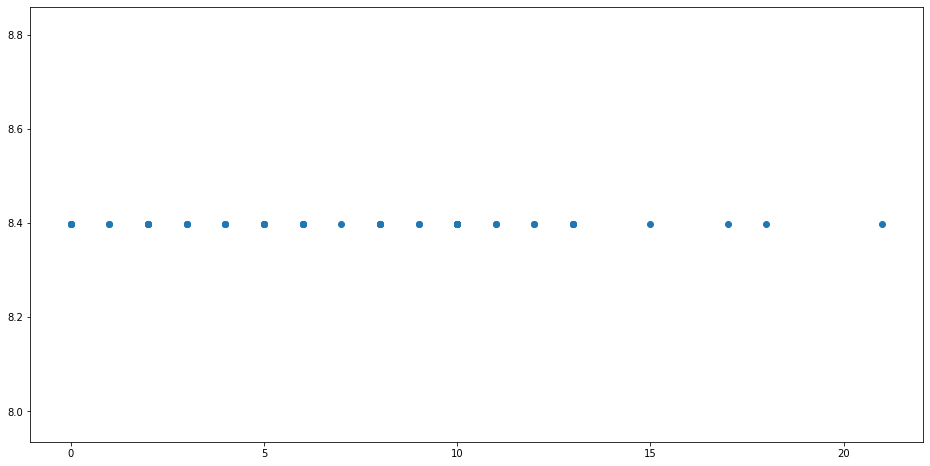

In [10]:
# Step 7a: Print the square root of mean_squared_error of your test and dummy prediction
print(mean_squared_error(y_test, y_hat_dummy))
# Step 7b: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_dummy)

20.163141438724182


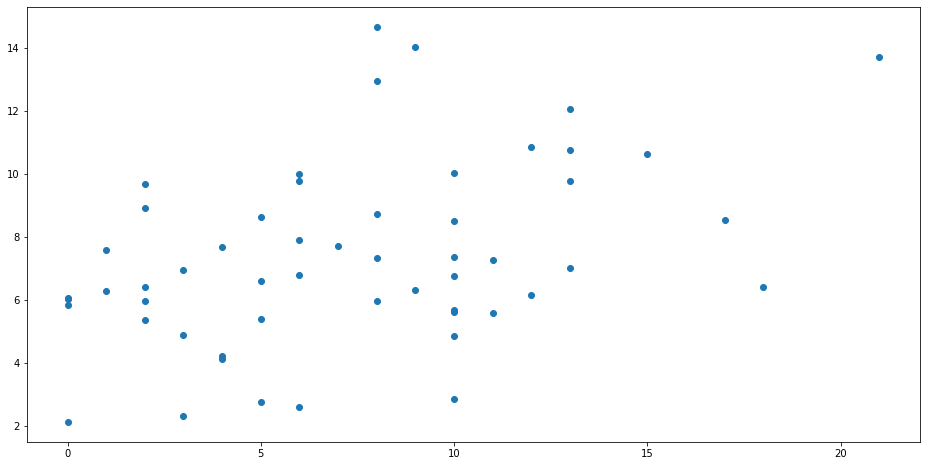

In [11]:
# Step 8a: Declare a variable to store the LinearRegression model
lr = LinearRegression()
# Step 8b: Fit your train dataset
lr.fit(X_train, y_train)
# Step 8c: Declare a variable and store your predictions that you make with your model using X test data
y_hat_lr = lr.predict(X_test)
# Step 8d: Print the RMSE for y test and the predictions
print(mean_squared_error(y_test, y_hat_lr))
# Step 8e: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_lr)

32.31481481481482


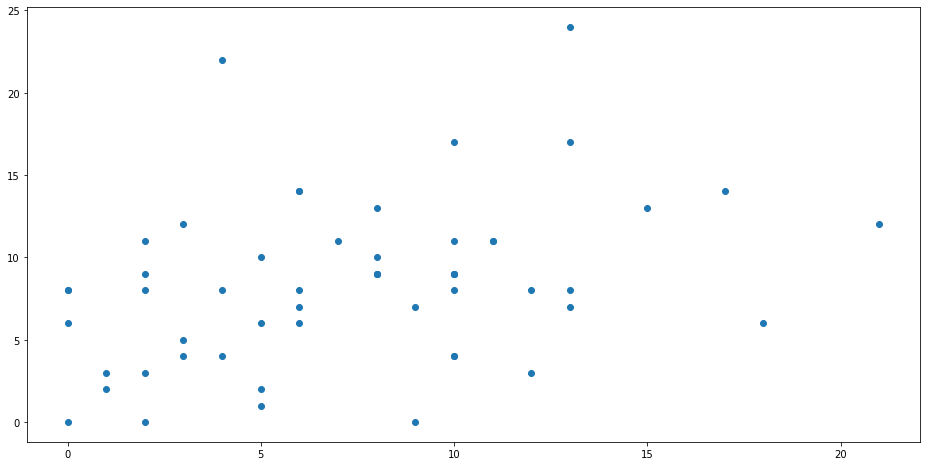

In [12]:
# Step 9a: Declare a variable to store the DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Step 9b: Fit your train dataset
tree.fit(X_train, y_train)
# Step 9c: Declare a variable and store your predictions that you make with your model using X test data
y_hat_tree = tree.predict(X_test)
# Step 9d: Print the RMSE for y test and the predictions
print(mean_squared_error(y_test, y_hat_tree))
# Step 9e: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_tree)

22.662292592592593


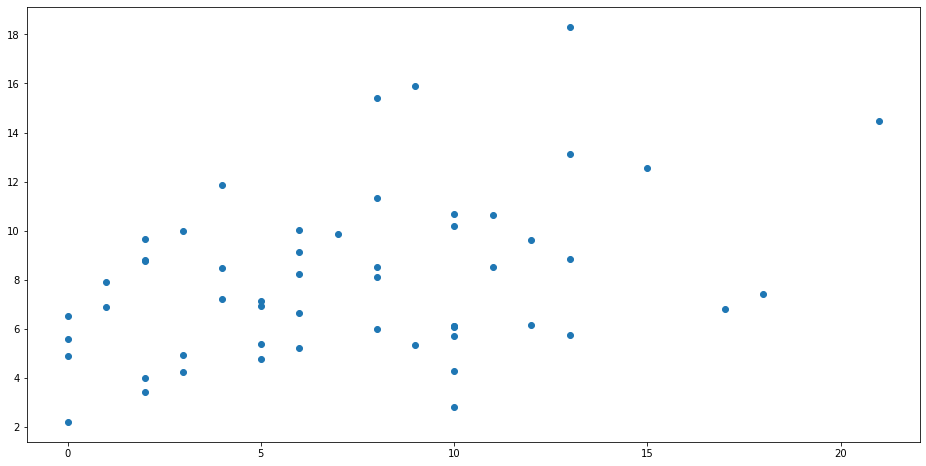

In [13]:
# Step 10a: Declare a variable to store the RandomForestRegressor
forest = RandomForestRegressor()
# Step 10b: Fit your train dataset
forest.fit(X_train, y_train)
# Step 10c: Declare a variable and store your predictions that you make with your model using X test data
y_hat_forest = forest.predict(X_test)
# Step 10d: Print the RMSE for y test and the predictions
print(mean_squared_error(y_test, y_hat_forest))
# Step 10e: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_forest)

### Step 11: Use the dummified category DataFrame as training data
Earlier, we used the numerical DataFrame as training data. Next, we'll try to see if our dummified categorical data is more useful in predicting ToDep.

Here, repeat Step 4. Don't drop anything and assign your categorical DataFrame as the independent variables.

We don't need to change the dependent variable since we're still predicting for 'ToDep'.

In [14]:
# Step 11: Assign the categorical DataFrame to a variable
X = df_objects

In [15]:
# Step 12: Split your variables into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2.00553542563552


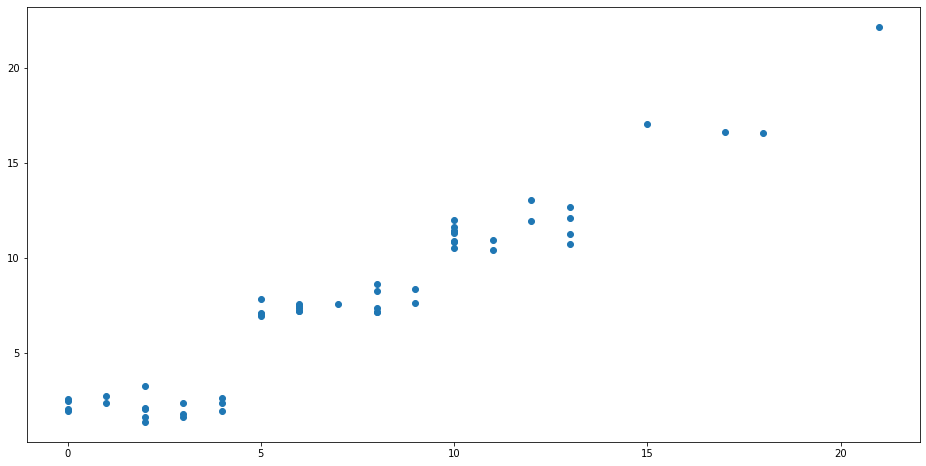

In [16]:
# Step 13a: Declare a variable to store the LinearRegression model
lr = LinearRegression()
# Step 13b: Fit your train dataset
lr.fit(X_train, y_train)
# Step 13c: Declare a variable and store your predictions that you make with your model using X test data
y_hat_lr = lr.predict(X_test)
# Step 13d: Print the RMSE for y test and the predictions
print(mean_squared_error(y_test, y_hat_lr))
# Step 13e: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_lr)

You might be impressed by your LinearRegression results. In fact, you gave RandomForest a try you'd be equally astounded because it's even better.

However, the reason why you're getting such good results is because when you prepared the dummified categorical variables, there was 'DepSev', which was related to 'ToDep'. We have Dep_Yes and DepType_Other and DepType_No which are also related to ToDep.

As such, there was 'peeking' involved since we used features that were derived from the dependent variable.

We will need to drop the following columns:
1. DepSev_Min
2. DepSev_Mod
3. DepSev_ModSev
4. DepSev_Sev
5. Dep_Yes
6. DepType_Other
7. DepType_No

Prepare the independent variables again.

In [17]:
# Step 15: Prepare the independent variables again
X = df_objects.drop(['DepSev_Min', 'DepSev_Mod', 'DepSev_ModSev', 'DepSev_Sev', 'Dep_Yes', 'DepType_Other', 'DepType_No'], axis = 1)

20.470071198384105


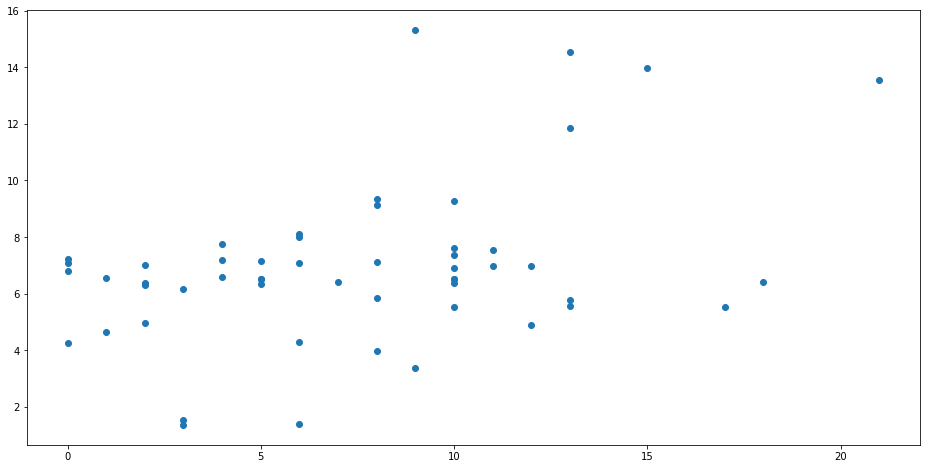

In [18]:
# Step 16a: Split your independent and dependent variables into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 16b: Declare a variable to store the LinearRegression model
lr = LinearRegression()
# Step 16c: Fit your train dataset
lr.fit(X_train, y_train)
# Step 16d: Declare a variable and store your predictions that you make with your model using X test data
y_hat_lr = lr.predict(X_test)
# Step 16e: Print the RMSE for y test and the predictions
print(mean_squared_error(y_test, y_hat_lr))
# Step 16f: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_lr)

47.05555555555556


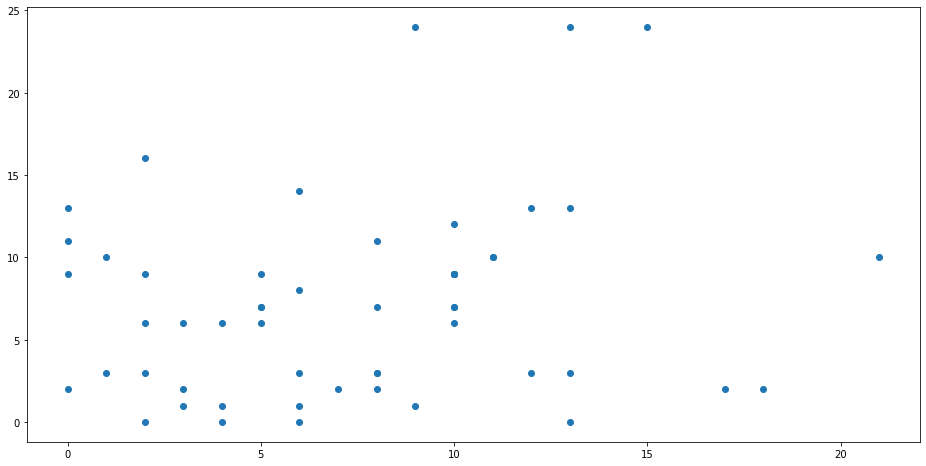

In [19]:
# Step 17a: Declare a variable to store the DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Step 17b: Fit your train dataset
tree.fit(X_train, y_train)
# Step 17c: Declare a variable and store your predictions that you make with your model using X test data
y_hat_tree = tree.predict(X_test)
# Step 17d: Print the RMSE for y test and the predictions
print(mean_squared_error(y_test, y_hat_tree))
# Step 17e: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_tree)

22.227673692819877


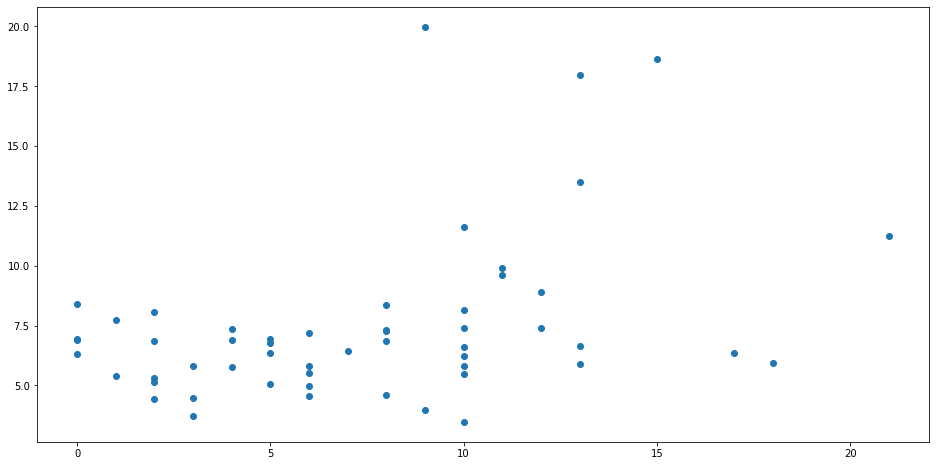

In [20]:
# Step 18a: Declare a variable to store the RandomForestRegressor
forest = RandomForestRegressor()
# Step 18b: Fit your train dataset
forest.fit(X_train, y_train)
# Step 18c: Declare a variable and store your predictions that you make with your model using X test data
y_hat_forest = forest.predict(X_test)
# Step 18d: Print the RMSE for y test and the predictions
print(mean_squared_error(y_test, y_hat_forest))
# Step 18e: Plot a scatterplot between test and prediction values
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_hat_forest)

### Step 19: Use the full DataFrame with mix of numerical and dummified categorical variables
Seems like using the dummified variables by themselves didn't lead to a model that's too good.

Time to use the entire dataset, i.e. CSV with both numerical and dummified categorical variables.

Don't forget to drop:
1. DepSev_Min
2. DepSev_Mod
3. DepSev_ModSev
4. DepSev_Sev
5. Dep_Yes
6. DepType_Other
7. DepType_No
8. ToDep
9. Age_cate